In [4]:
# Make simulated data 
x <- 1:20
y <- 1:20

df <- data.frame(x=rep(1:20, 20), y=rep(1:20, each=20))

df$v1 <- 0.04*df$x + rnorm(400, 0, 0.2)
df$v2 <- 0.07*df$x + 0.2*df$y - 0.05*df$x * df$y + rnorm(400, 0, 0.2)
df$v3 <- df$v1 * rnorm(400, 1, 0.2)
df$v4 <- df$v2 * rnorm(400, 1, 0.6)
df$v5 <- 3*sin(df$x) + log(df$y) + rnorm(400, 0, 0.5)
df$v6 <- (abs(df$x - df$y))^2 + rnorm(400, 0, 5)

In [9]:
head(df)

x,y,v1,v2,v3,v4,v5,v6
1,1,-0.37662112,0.1760228,-0.35140349,0.26529849,2.094572,-6.8425457
2,1,-0.08076768,0.4519052,-0.09368188,0.77848744,2.509414,-0.1005988
3,1,0.14656444,0.2106664,0.16316067,0.05876673,0.877079,-1.6408603
4,1,-0.14849482,0.1802774,-0.09753910,0.08033471,-2.959336,2.5408964
5,1,0.04842883,0.1837765,0.05771363,0.04675901,-4.117046,12.8181444
6,1,0.19330288,0.1578406,0.21902246,0.06119958,-1.078471,25.8715545


In [10]:
df2matrix <- function(df, var) {
  m <- matrix(nrow=20, ncol=20)
  for (i in 1:nrow(df)) {
    x <- df[i, 'x']
    y <- df[i, 'y']
    val <- df[i, var]
    m[x, y] <- val
  }
  m
}

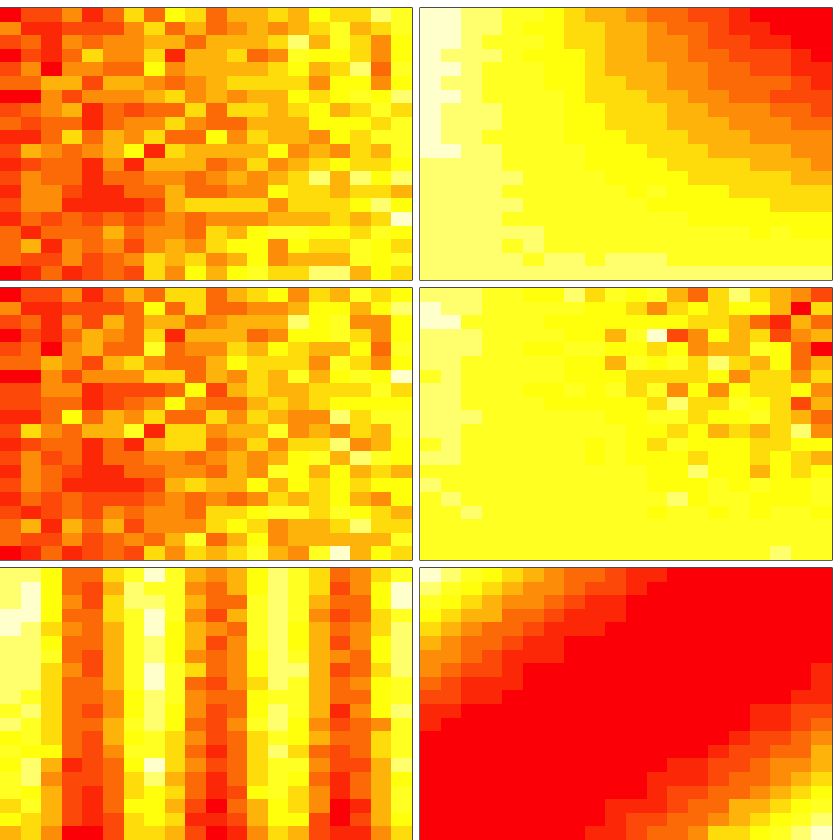

In [16]:
par(mfrow=c(3, 2))
par(mar=c(0, 0, 0.5, 0.5))
for (i in 1:6) {
  image(df2matrix(df, paste('v', i, sep='')), xaxt='n', yaxt='n')    
}

In [35]:
for (i in 1:6) {
  cat(sprintf('%d: [%.2f, %.2f]\n', 
              i, 
              quantile(df[, paste('v', i, sep='')], prob=0.1), 
              quantile(df[, paste('v', i, sep='')], prob=0.8)))
}

1: [0.02, 0.66]
2: [-8.32, 0.23]
3: [0.02, 0.70]
4: [-8.75, 0.27]
5: [-0.90, 4.65]
6: [1.23, 123.84]


In [36]:
# Add tree and beetle values
df$tree <- ifelse(
  df$v5 > -1.52 & df$v5 < 5.68 & df$v2 > -10.11 & df$v2 < 1.36, 1, 0)
df$beetle <- ifelse((df$tree == 1 
                     & df$v1 > 0.02 & df$v1 < 0.66 
                     & df$v4 > -8.75 & df$v4 < 0.27),
                    1,
                    0)

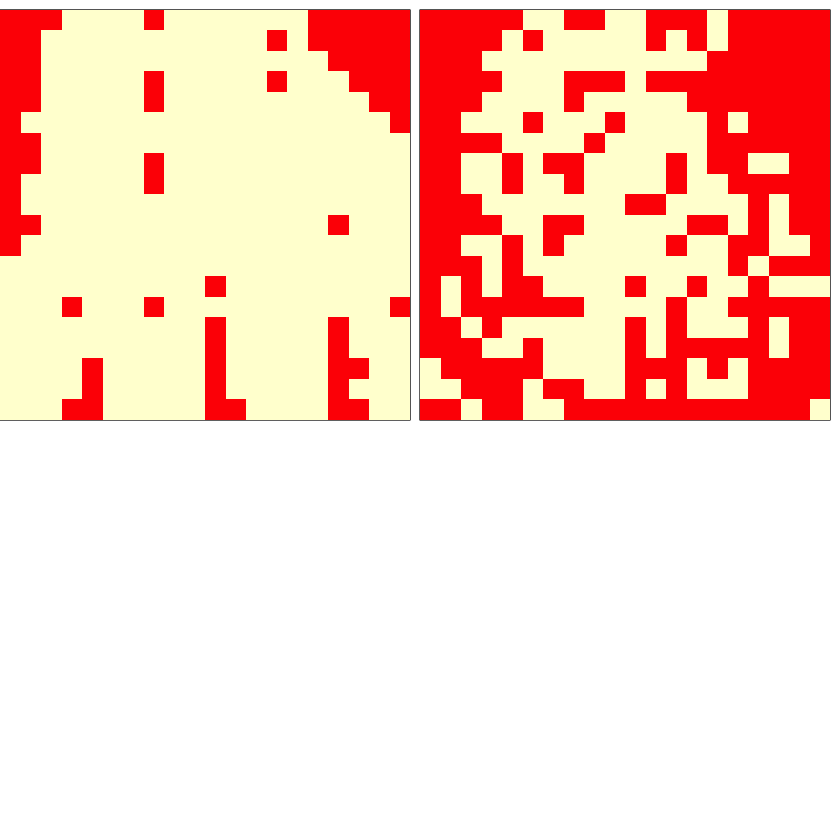

In [38]:
par(mfrow=c(2, 2))
par(mar=c(0, 0, 0.5, 0.5))
image(df2matrix(df, 'tree'), xaxt='n', yaxt='n')
image(df2matrix(df, 'beetle'), xaxt='n', yaxt='n')

In [39]:
head(df)

x,y,v1,v2,v3,v4,v5,v6,tree,beetle
1,1,-0.37662112,0.1760228,-0.35140349,0.26529849,2.094572,-6.8425457,1,0
2,1,-0.08076768,0.4519052,-0.09368188,0.77848744,2.509414,-0.1005988,1,0
3,1,0.14656444,0.2106664,0.16316067,0.05876673,0.877079,-1.6408603,1,1
4,1,-0.14849482,0.1802774,-0.09753910,0.08033471,-2.959336,2.5408964,0,0
5,1,0.04842883,0.1837765,0.05771363,0.04675901,-4.117046,12.8181444,0,0
6,1,0.19330288,0.1578406,0.21902246,0.06119958,-1.078471,25.8715545,1,1


In [40]:
vars <- 2:7
pca <- princomp(df[, vars], cor=T)

In [43]:
summary(pca, loadings <- T)

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.700161 1.2463179 0.9327888 0.69381680 0.38996724
Proportion of Variance 0.481758 0.2588847 0.1450158 0.08023029 0.02534574
Cumulative Proportion  0.481758 0.7406427 0.8856585 0.96588878 0.99123452
                            Comp.6
Standard deviation     0.229331369
Proportion of Variance 0.008765479
Cumulative Proportion  1.000000000

Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
y   0.236  0.616  0.109  0.685  0.288       
v1  0.478 -0.389 -0.270  0.167         0.717
v2 -0.524 -0.200 -0.232         0.790       
v3  0.475 -0.388 -0.281  0.187  0.174 -0.693
v4 -0.461 -0.203 -0.345  0.610 -0.505       
v5         0.488 -0.815 -0.304              

In [44]:
str(pca)

List of 7
 $ sdev    : Named num [1:6] 1.7 1.246 0.933 0.694 0.39 ...
  ..- attr(*, "names")= chr [1:6] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ loadings: 'loadings' num [1:6, 1:6] 0.236 0.478 -0.524 0.475 -0.461 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "y" "v1" "v2" "v3" ...
  .. ..$ : chr [1:6] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ center  : Named num [1:6] 10.5 0.413 -2.701 0.415 -2.485 ...
  ..- attr(*, "names")= chr [1:6] "y" "v1" "v2" "v3" ...
 $ scale   : Named num [1:6] 5.766 0.291 3.627 0.303 4.294 ...
  ..- attr(*, "names")= chr [1:6] "y" "v1" "v2" "v3" ...
 $ n.obs   : int 400
 $ scores  : num [1:400, 1:6] -3.6 -2.8 -1.95 -2.93 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:6] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ call    : language princomp(x = df[, vars], cor = T)
 - attr(*, "class")= chr "princomp"


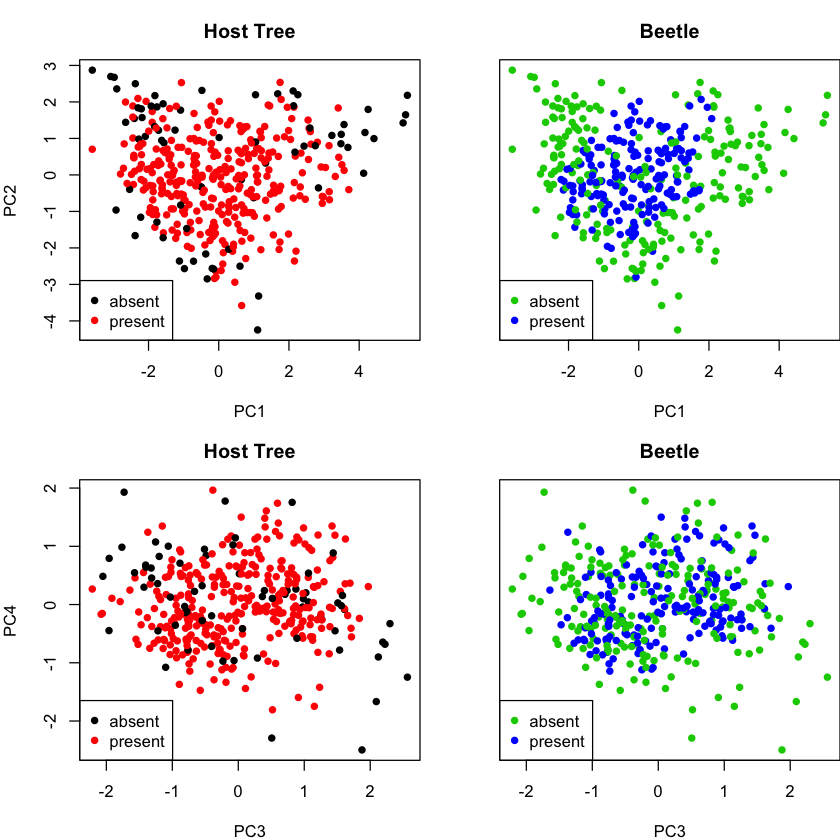

In [57]:
par(mfrow=c(2, 2))
par(mar=c(4, 4, 3, 0))
for(i in c(1, 3)) {
  plot(pca$scores[, i], 
       pca$scores[, i + 1], 
       col=(df$tree + 1), 
       pch=16,
       xlab=paste('PC', i, sep=''),
       ylab=paste('PC', i + 1, sep=''), 
       main='Host Tree')
  legend('bottomleft', pch=16, col=1:2, legend=c('absent', 'present'))
  plot(pca$scores[, i], 
       pca$scores[, i + 1], 
       col=(df$beetle + 3), 
       pch=16,
       xlab=paste('PC', i, sep=''),
       ylab='', 
       yaxt='n',
       main='Beetle')
  legend('bottomleft', pch=16, col=3:4, legend=c('absent', 'present'))

}
